In this second set of exercices you will have to develop two Machine Learning procedures. In both cases is mandatory to use Apache Spark 2.x and if you need any necessary library to manage data or to generate features you must use Apache MLlib (DataFrame version). Check the following aspects:


**Problem 2:**

Using the dataset, build a Machine Learning procedure to classify if the return of a SONAR signal is a Rock or a Mine. You have all the data available at: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+%28Sonar%2C+Mines+vs.+Rocks%29. 
Make sure that you use `sonar.all-data` dataset. Check the following aspects:

* Make sure that your dataset is technically correct
* Check the consistency of your dataset
* In this exercise is mandatory to use Pipelines
* Split your data into two sets: 80% of the data for training and 20% of the data for testing
* Check that the labels in both sets are equaly distributed (hint: this is called stratified sampling)
* Provide convenient measures to check how the model is behaving

In [1]:
import matplotlib.pyplot as plt
import pyspark
from pyspark.sql.types import IntegerType
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL exercise2b") \
    .getOrCreate()

In [2]:
spark

In [3]:
file = spark.read.csv("../data/sonar.all-data")
file.count()

208

In [4]:
file.take(2)

[Row(_c0='0.0200', _c1='0.0371', _c2='0.0428', _c3='0.0207', _c4='0.0954', _c5='0.0986', _c6='0.1539', _c7='0.1601', _c8='0.3109', _c9='0.2111', _c10='0.1609', _c11='0.1582', _c12='0.2238', _c13='0.0645', _c14='0.0660', _c15='0.2273', _c16='0.3100', _c17='0.2999', _c18='0.5078', _c19='0.4797', _c20='0.5783', _c21='0.5071', _c22='0.4328', _c23='0.5550', _c24='0.6711', _c25='0.6415', _c26='0.7104', _c27='0.8080', _c28='0.6791', _c29='0.3857', _c30='0.1307', _c31='0.2604', _c32='0.5121', _c33='0.7547', _c34='0.8537', _c35='0.8507', _c36='0.6692', _c37='0.6097', _c38='0.4943', _c39='0.2744', _c40='0.0510', _c41='0.2834', _c42='0.2825', _c43='0.4256', _c44='0.2641', _c45='0.1386', _c46='0.1051', _c47='0.1343', _c48='0.0383', _c49='0.0324', _c50='0.0232', _c51='0.0027', _c52='0.0065', _c53='0.0159', _c54='0.0072', _c55='0.0167', _c56='0.0180', _c57='0.0084', _c58='0.0090', _c59='0.0032', _c60='R'),
 Row(_c0='0.0453', _c1='0.0523', _c2='0.0843', _c3='0.0689', _c4='0.1183', _c5='0.2583', _c6='

In [5]:
file.printSchema()

root
 |-- _c0: string (nullable = true)
 |-- _c1: string (nullable = true)
 |-- _c2: string (nullable = true)
 |-- _c3: string (nullable = true)
 |-- _c4: string (nullable = true)
 |-- _c5: string (nullable = true)
 |-- _c6: string (nullable = true)
 |-- _c7: string (nullable = true)
 |-- _c8: string (nullable = true)
 |-- _c9: string (nullable = true)
 |-- _c10: string (nullable = true)
 |-- _c11: string (nullable = true)
 |-- _c12: string (nullable = true)
 |-- _c13: string (nullable = true)
 |-- _c14: string (nullable = true)
 |-- _c15: string (nullable = true)
 |-- _c16: string (nullable = true)
 |-- _c17: string (nullable = true)
 |-- _c18: string (nullable = true)
 |-- _c19: string (nullable = true)
 |-- _c20: string (nullable = true)
 |-- _c21: string (nullable = true)
 |-- _c22: string (nullable = true)
 |-- _c23: string (nullable = true)
 |-- _c24: string (nullable = true)
 |-- _c25: string (nullable = true)
 |-- _c26: string (nullable = true)
 |-- _c27: string (nullable = tru

In [6]:
dftypes = file
for col in file.columns:
    if col != "_c60":
        dftypes = dftypes.withColumn(col, dftypes[col].cast("double"))
dftypes.printSchema()        

root
 |-- _c0: double (nullable = true)
 |-- _c1: double (nullable = true)
 |-- _c2: double (nullable = true)
 |-- _c3: double (nullable = true)
 |-- _c4: double (nullable = true)
 |-- _c5: double (nullable = true)
 |-- _c6: double (nullable = true)
 |-- _c7: double (nullable = true)
 |-- _c8: double (nullable = true)
 |-- _c9: double (nullable = true)
 |-- _c10: double (nullable = true)
 |-- _c11: double (nullable = true)
 |-- _c12: double (nullable = true)
 |-- _c13: double (nullable = true)
 |-- _c14: double (nullable = true)
 |-- _c15: double (nullable = true)
 |-- _c16: double (nullable = true)
 |-- _c17: double (nullable = true)
 |-- _c18: double (nullable = true)
 |-- _c19: double (nullable = true)
 |-- _c20: double (nullable = true)
 |-- _c21: double (nullable = true)
 |-- _c22: double (nullable = true)
 |-- _c23: double (nullable = true)
 |-- _c24: double (nullable = true)
 |-- _c25: double (nullable = true)
 |-- _c26: double (nullable = true)
 |-- _c27: double (nullable = tru

In [7]:
dftypes.show(2)

+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+----+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+-----+------+------+------+----+
|   _c0|   _c1|   _c2|   _c3|   _c4|   _c5|   _c6|   _c7|   _c8|   _c9|  _c10|  _c11|  _c12|  _c13|  _c14|  _c15|_c16|  _c17|  _c18|  _c19|  _c20|  _c21|  _c22|  _c23|  _c24|  _c25|  _c26|  _c27|  _c28|  _c29|  _c30|  _c31|  _c32|  _c33|  _c34|  _c35|  _c36|  _c37|  _c38|  _c39|  _c40|  _c41|  _c42|  _c43|  _c44|  _c45|  _c46|  _c47|  _c48|  _c49|  _c50|  _c51|  _c52|  _c53|  _c54|  _c55| _c56|  _c57|  _c58|  _c59|_c60|
+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+------+----+------+------+------+------+------

In [8]:
# Describe the range of values of columns
cols = []
i = 0
for col in dftypes.columns:
    cols.append(col)
    i = i + 1
    
    if i == 5:
        dftypes.describe(cols).show()
        i = 0
        cols = []  

+-------+--------------------+-------------------+-------------------+-------------------+-------------------+
|summary|                 _c0|                _c1|                _c2|                _c3|                _c4|
+-------+--------------------+-------------------+-------------------+-------------------+-------------------+
|  count|                 208|                208|                208|                208|                208|
|   mean|0.029163942307692307|0.03843653846153848|0.04383221153846154|0.05389230769230771|0.07520240384615384|
| stddev|0.022990913933847074|0.03295992899508177|0.03842811182793593|0.04652796404450867|0.05555216762221743|
|    min|              0.0015|             6.0E-4|             0.0015|             0.0058|             0.0067|
|    max|              0.1371|             0.2339|             0.3059|             0.4264|              0.401|
+-------+--------------------+-------------------+-------------------+-------------------+-------------------+



+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|summary|                _c50|                _c51|                _c52|                _c53|                _c54|
+-------+--------------------+--------------------+--------------------+--------------------+--------------------+
|  count|                 208|                 208|                 208|                 208|                 208|
|   mean|0.016068750000000007|0.013420192307692317|0.010709134615384612|0.010940865384615391|0.009290384615384615|
| stddev|0.012008496765424773|0.009633986536278559| 0.00706033782916826|0.007300804880593404|0.007087629820307623|
|    min|                 0.0|              8.0E-4|              5.0E-4|               0.001|              6.0E-4|
|    max|              0.1004|              0.0709|               0.039|              0.0352|              0.0447|
+-------+--------------------+--------------------+--------------------+--------

In [9]:
dftypes.groupBy("_c60").count().show()


+----+-----+
|_c60|count|
+----+-----+
|   M|  111|
|   R|   97|
+----+-----+



In [10]:
# DataFrame don't have nulls
for col in dftypes.columns:
    print(col + " is null:", dftypes.filter(dftypes[col].isNull()).count(), end=' - ')

_c0 is null: 0 - _c1 is null: 0 - _c2 is null: 0 - _c3 is null: 0 - _c4 is null: 0 - _c5 is null: 0 - _c6 is null: 0 - _c7 is null: 0 - _c8 is null: 0 - _c9 is null: 0 - _c10 is null: 0 - _c11 is null: 0 - _c12 is null: 0 - _c13 is null: 0 - _c14 is null: 0 - _c15 is null: 0 - _c16 is null: 0 - _c17 is null: 0 - _c18 is null: 0 - _c19 is null: 0 - _c20 is null: 0 - _c21 is null: 0 - _c22 is null: 0 - _c23 is null: 0 - _c24 is null: 0 - _c25 is null: 0 - _c26 is null: 0 - _c27 is null: 0 - _c28 is null: 0 - _c29 is null: 0 - _c30 is null: 0 - _c31 is null: 0 - _c32 is null: 0 - _c33 is null: 0 - _c34 is null: 0 - _c35 is null: 0 - _c36 is null: 0 - _c37 is null: 0 - _c38 is null: 0 - _c39 is null: 0 - _c40 is null: 0 - _c41 is null: 0 - _c42 is null: 0 - _c43 is null: 0 - _c44 is null: 0 - _c45 is null: 0 - _c46 is null: 0 - _c47 is null: 0 - _c48 is null: 0 - _c49 is null: 0 - _c50 is null: 0 - _c51 is null: 0 - _c52 is null: 0 - _c53 is null: 0 - _c54 is null: 0 - _c55 is null: 0 - _c

In [11]:
dfok = dftypes

In [12]:
# Histogram of all columns
df_plt = []
i=1
for col in dfok.columns:
    if col != "_c60":
        print (col, end=' ');
        df_plt.append(dfok.select(col).rdd.flatMap(lambda x: x).collect())
        i+=1

_c0 _c1 _c2 _c3 _c4 _c5 _c6 _c7 _c8 _c9 _c10 _c11 _c12 _c13 _c14 _c15 _c16 _c17 _c18 _c19 _c20 _c21 _c22 _c23 _c24 _c25 _c26 _c27 _c28 _c29 _c30 _c31 _c32 _c33 _c34 _c35 _c36 _c37 _c38 _c39 _c40 _c41 _c42 _c43 _c44 _c45 _c46 _c47 _c48 _c49 _c50 _c51 _c52 _c53 _c54 _c55 _c56 _c57 _c58 _c59 

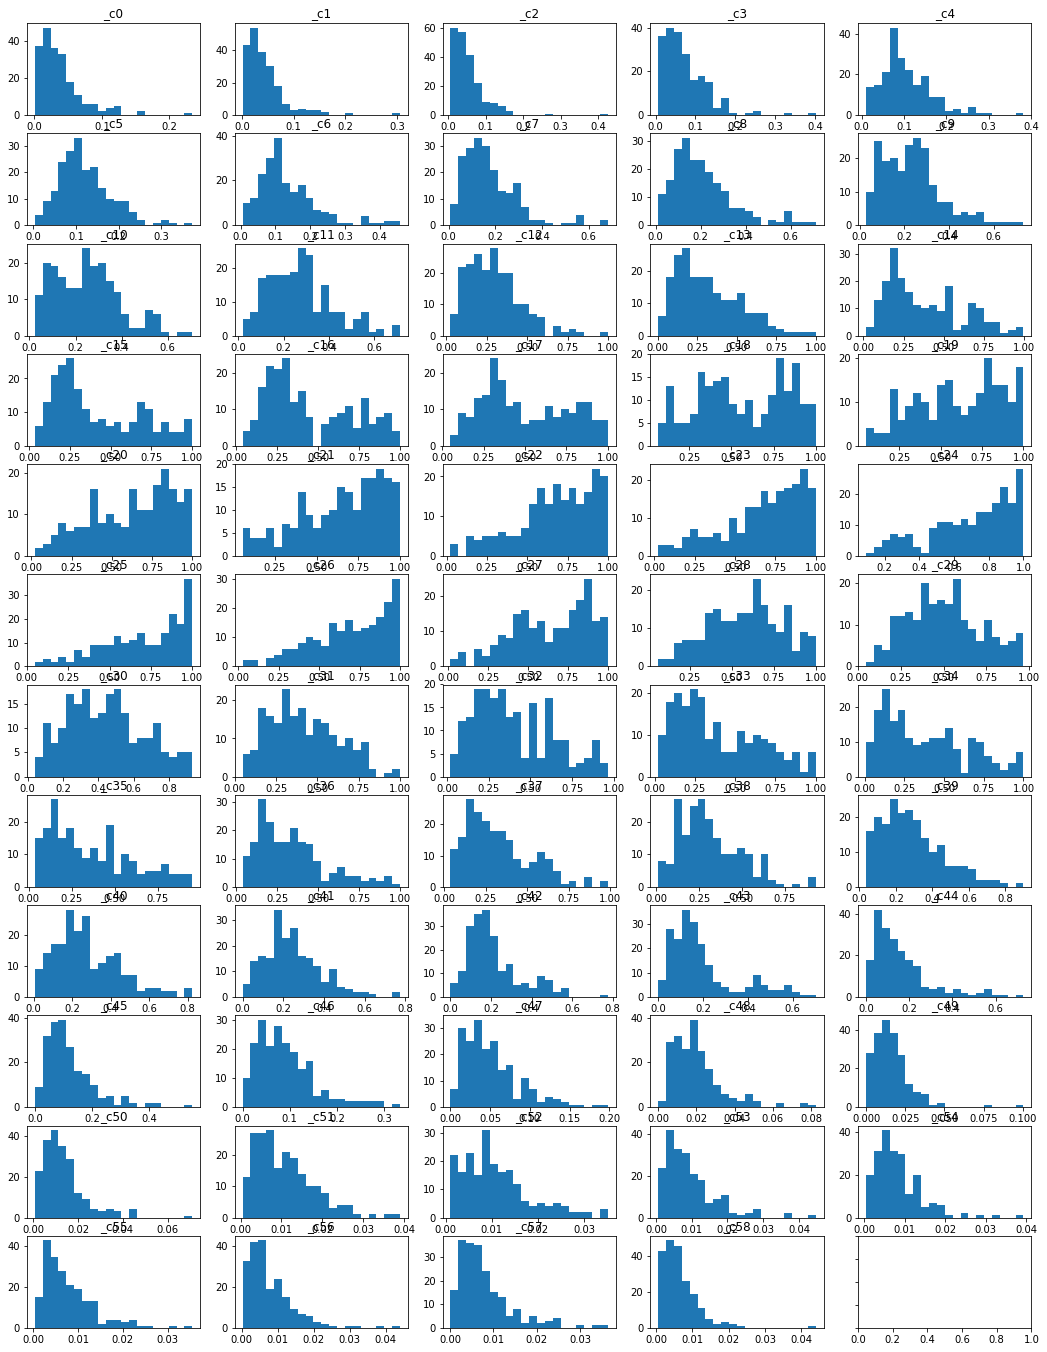

In [13]:
fig, axs = plt.subplots(12, 5, figsize=(18,24), sharey=True)
i = 1
for col in dfok.columns:
    if i < 60:
        plt.subplot(12,5, i)
        plt.hist(df_plt[i], bins=20)
        plt.title(col)
        i = i +1
    
plt.show()